In [12]:
from data_collection import *
from DBSCAN_model import *

In [13]:
selected_clusters = ['NGC_2311', 'NGC_3293', 'NGC_2244', 'NGC_2264', 'NGC_1893', 
                     'NGC_6231', 'NGC_6823', 'NGC_6913', 'NGC_581', 'IC_1805']

In [14]:
all_stars = {}
cantat_members = {}
rf_members = {}

dbscan_model_parameter = {}
dbscan_members = {}
dbscan_non_members = {}

In [15]:
def dbscan_parameter_search(cluster_name, search_radius = 0.5, eps = np.linspace(0.02,0.08,13), 
                    min_samples = np.linspace(5,45,9),
                    feature_columns = ['pmra', 'pmdec', 'parallax']):
    
    # Get GAIA data and run GMM model
    all_stars[cluster_name] = get_GAIA_data(cluster_name, radius = search_radius)
    dbscan_model_parameter[cluster_name] = compare_DBSCAN_parameters(all_stars, eps, min_samples, feature_columns)
    
    return dbscan_model_parameter[cluster_name]
    
    

In [16]:
def dbscan_analysis(cluster_name, best_ep, best_min_sample, save_member = True, 
                    feature_columns = ['pmra', 'pmdec', 'parallax'] ):

    dbscan_members[cluster_name], dbscan_non_members[cluster_name] = get_members(all_stars, 
                                                                                 best_ep, best_min_sample, 
                                                                                 feature_columns)

    # save the members
    if save_member:
        save_members(cluster_name, dbscan_members[cluster_name], 
                     cluster_name+'_dbscan_members.csv')
    
    # compare with Cantat and RF
    cantat_members[cluster_name] = get_cantat_data(clusters = cluster_name)
    rf_members[cluster_name] = get_rf_member(cluster_name)
    compare_with_cantat(cluster_name, cantat_member[cluster_name], dbscan_members[cluster_name], rf_members[cluster_name])
    

Object Name: NGC_1893
Co-ordinate <SkyCoord (ICRS): (ra, dec) in deg
    (80.724, 33.444)>
INFO: Query finished. [astroquery.utils.tap.core]
Total Raw Stars: 34972


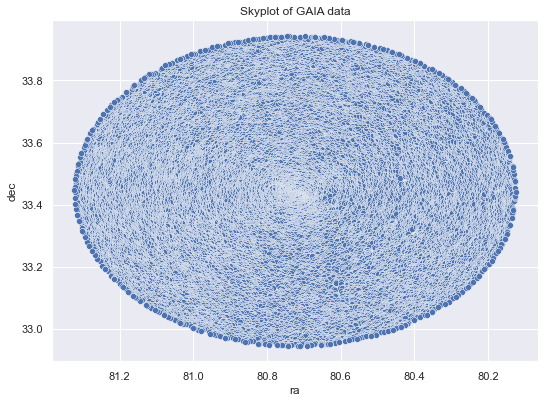

Number of stars after applying noise filter: 8227
Number of stars after applying other filters: 7940


AttributeError: 'dict' object has no attribute 'loc'

In [17]:
cluster_name = selected_clusters[4]

parameter_results = dbscan_parameter_search(cluster_name, search_radius = 0.5)
parameter_results.head()

In [ ]:
best_ep = 
best_min_sample = 
dbscan_analysis(cluster_name, best_ep, best_min_sample)

### Complied Members

In [36]:
all_members_dbscan = pd.concat([member for member in dbscan_members.values()]).reset_index(drop = True)
all_members_dbscan.head()

,solution_id,DESIGNATION,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,...,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,dist,g_mag_error,distance_pc,PMemb,gmm_label,Cluster
0,1635721458409799680,b'Gaia DR2 604917629355038848',604917629355038848,309606362,2015.5,132.845427,0.033842,11.813721,0.022365,1.129222,...,5.409647,5.116649,5.702646,b'https://gea.esac.esa.int/data-server/datalin...,0.000629,0.000205,885.565629,0.999500,1,NGC_2682
1,1635721458409799680,b'Gaia DR2 604917732434252032',604917732434252032,1037136882,2015.5,132.847883,0.047155,11.818284,0.028357,1.113444,...,0.286409,0.253650,0.319167,b'https://gea.esac.esa.int/data-server/datalin...,0.004667,0.000698,898.114453,0.999236,1,NGC_2682
2,1635721458409799680,b'Gaia DR2 604917732434325248',604917732434325248,1685360922,2015.5,132.845628,0.023422,11.820310,0.014362,1.125087,...,3.119858,2.927116,3.312600,b'https://gea.esac.esa.int/data-server/datalin...,0.006326,0.000288,888.820446,0.999405,1,NGC_2682
3,1635721458409799680,b'Gaia DR2 604917629355039360',604917629355039360,340729517,2015.5,132.846939,0.039546,11.807362,0.023041,1.111626,...,1.604247,1.452243,1.756252,b'https://gea.esac.esa.int/data-server/datalin...,0.006695,0.000869,899.583451,0.998115,1,NGC_2682
4,1635721458409799680,b'Gaia DR2 604917698074587136',604917698074587136,1308383390,2015.5,132.840032,0.034797,11.817361,0.020084,1.189351,...,0.544629,0.501133,0.588124,b'https://gea.esac.esa.int/data-server/datalin...,0.006747,0.000606,840.794499,0.999512,1,NGC_2682


In [37]:
# all_members_dbscan.to_csv('all_clusters_dbscan_members.csv', index = False)

In [33]:
## Save the non-members data
for cluster_name, non_member in dbscan_non_members.items():
    non_member['Cluster'] = [cluster_name] * len(non_member)

In [38]:
all_non_members_dbscan = pd.concat([non_member for non_member in dbscan_non_members.values()]).reset_index(drop = True)
all_non_members_dbscan.head()

,solution_id,DESIGNATION,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,...,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,dist,g_mag_error,distance_pc,PMemb,gmm_label,Cluster
0,1635721458409799680,b'Gaia DR2 604917693778923264',604917693778923264,69047986,2015.5,132.832854,0.066634,11.810440,0.040339,0.892243,...,0.239855,0.193084,0.286626,b'https://gea.esac.esa.int/data-server/datalin...,0.013355,0.000899,1120.771043,1.643154e-134,0,NGC_2682
1,1635721458409799680,b'Gaia DR2 604917423196681088',604917423196681088,1396391816,2015.5,132.853470,0.035284,11.801113,0.020744,1.260482,...,0.908870,0.839506,0.978235,b'https://gea.esac.esa.int/data-server/datalin...,0.014809,0.000299,793.347195,2.081859e-02,0,NGC_2682
2,1635721458409799680,b'Gaia DR2 604917590699705472',604917590699705472,212057801,2015.5,132.829021,0.309143,11.806033,0.201413,1.905373,...,NaN,NaN,NaN,b'https://gea.esac.esa.int/data-server/datalin...,0.018433,0.005467,524.831603,9.482690e-08,0,NGC_2682
3,1635721458409799680,b'Gaia DR2 604917423196609280',604917423196609280,1065808135,2015.5,132.855667,0.034606,11.792845,0.021592,1.154304,...,6.068649,5.744357,6.392942,b'https://gea.esac.esa.int/data-server/datalin...,0.023167,0.000175,866.322848,1.100501e-06,0,NGC_2682
4,1635721458409799680,b'Gaia DR2 604917590700906624',604917590700906624,250574647,2015.5,132.821077,0.292941,11.808587,0.158380,2.089327,...,NaN,NaN,NaN,b'https://gea.esac.esa.int/data-server/datalin...,0.024993,0.005028,478.623019,3.387752e-17,0,NGC_2682


In [39]:
# all_non_members_dbscan.to_csv('all_clusters_dbscan_field_stars.csv', index = False)